# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)

It is recomended also to use **seaborn** library

### Step 1. Import the necessary libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from azureml import Workspace

ws = Workspace()

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Step 2. Import the dataset from titanic.csv 

In [2]:
ds = ws.datasets['titanic.csv']

### Step 3. Assign it to a variable titanic 

In [3]:
titanic = ds.to_dataframe()

### Step 4. Set PassengerId as the index 

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic = titanic.set_index('PassengerId')

In [6]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pairplot to check how variables correlate

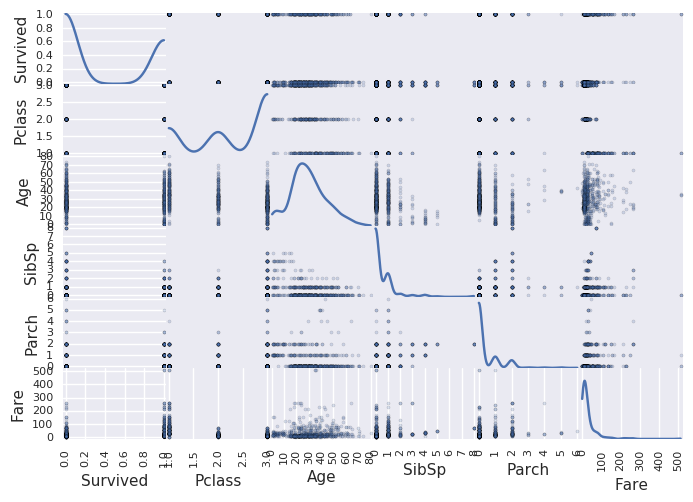

In [7]:
pd.scatter_matrix(titanic, alpha=0.2, diagonal = 'kde')
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

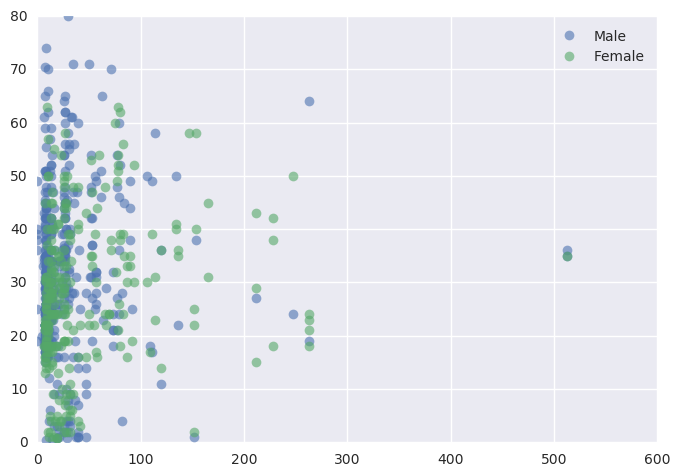

In [22]:
males = titanic[titanic.Sex == 'male']
females = titanic[titanic.Sex != 'male']
xm = males.Fare
ym = males.Age
xf = females.Fare
yf = females.Age

plt.plot(xm, ym, alpha = 0.6, marker = "o", linestyle = '', label = "Male")
plt.plot(xf, yf, alpha = 0.6, marker = "o", linestyle = '', label = "Female")
plt.legend()
plt.show()

### Step 7. How many people survived?

In [12]:
titanic['Survived'].value_counts()[1]

342

### Step 8. Create a histogram with the Fare payed

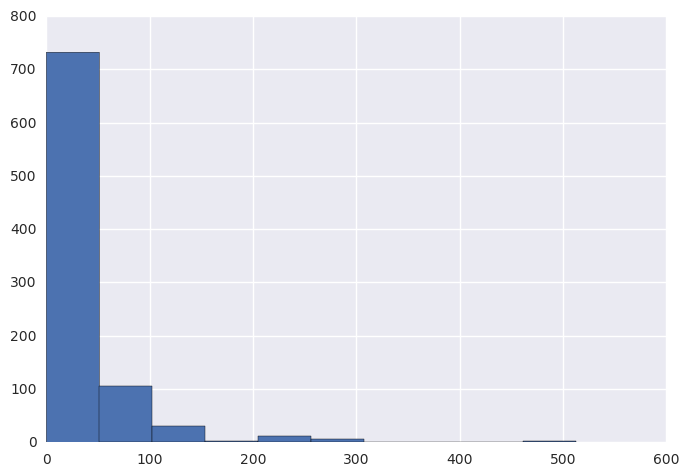

In [13]:
plt.hist(titanic.Fare)
plt.show()

### Step 9: Create a diagonal correlation plot af all variables ([tip](http://seaborn.pydata.org/examples/many_pairwise_correlations.html))

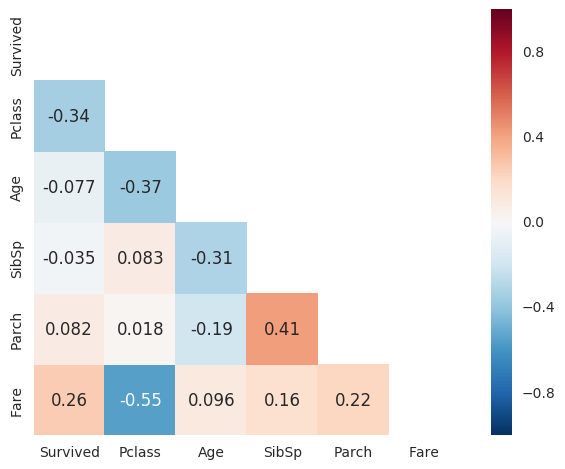

In [14]:
corr = titanic.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, square=True, annot = True)
plt.show()

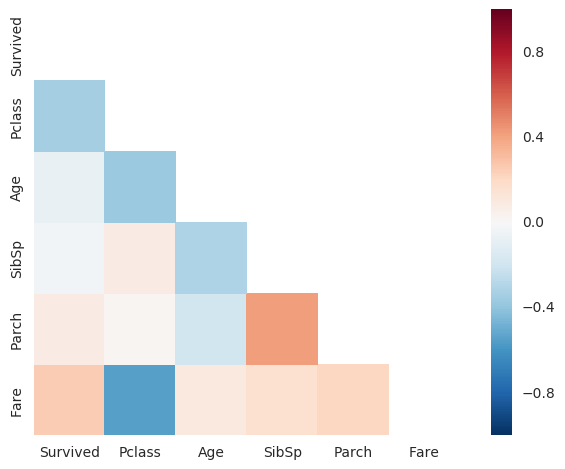

In [15]:
## Sin anotaciones
corr = titanic.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, square=True)
plt.show()